In [1]:
import pandas as pd
import numpy as np
import matplotlib as matlab


In [2]:
dataset=pd.read_csv("insurance_pre.csv")
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [3]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [4]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [5]:
independent=dataset[['age', 'bmi', 'children',  'sex_male', 'smoker_yes']]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [6]:
dependent=dataset[['charges']]
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [7]:
#sklearn library used to split train and test model
from sklearn.model_selection import train_test_split
#Then call train_test_split function it is parameterised function
X_train,X_test,Y_train,Y_test=train_test_split(independent, dependent, test_size=0.30, random_state=0)

In [15]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion="mae",splitter="random",max_features="sqrt")
regressor=regressor.fit(X_train,Y_train)


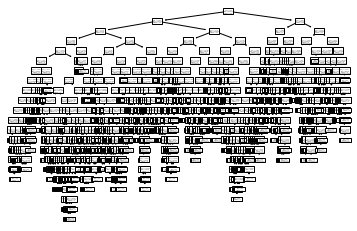

In [16]:
#this library for graph purpose
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid={"criterion":['mse','mae','friedman_mse'],'max_features':['auto','sqrt','log2'],'splitter':['best','random']}
grid=GridSearchCV(DecisionTreeRegressor(),param_grid,refit=True,verbose=3,n_jobs=-1)
#fitting the model for grid search
grid.fit(X_train,Y_train)
#regressor=SVR(kernel="precomputed",C=10)
#regressor.fit(X_train,Y_train)

C:\Users\axisi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    3.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             p

In [11]:
#print best parameter after tuning
#print(grid.best_params_)
re=grid.cv_results_
#print (re)
grid_predictions=grid.predict(X_test)
#print classification report
from sklearn.metrics import r2_score
r_score=r2_score(Y_test,grid_predictions)
print("The R_score value for best parameter{}:".format(grid.best_params_),r_score)

The R_score value for best parameter{'criterion': 'friedman_mse', 'max_features': 'auto', 'splitter': 'random'}: 0.6930192694518283


In [12]:
table=pd.DataFrame.from_dict(re)
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007682,0.000717,0.003609,0.000445,mse,auto,best,"{'criterion': 'mse', 'max_features': 'auto', '...",0.569222,0.703982,0.637828,0.637010,0.055018,6
1,0.008860,0.000633,0.006425,0.001782,mse,auto,random,"{'criterion': 'mse', 'max_features': 'auto', '...",0.611900,0.663958,0.586741,0.620866,0.032155,8
2,0.006687,0.000415,0.004109,0.000673,mse,sqrt,best,"{'criterion': 'mse', 'max_features': 'sqrt', '...",0.638146,0.650504,0.662471,0.650374,0.009931,2
3,0.006059,0.000823,0.004173,0.000259,mse,sqrt,random,"{'criterion': 'mse', 'max_features': 'sqrt', '...",0.491651,0.573588,0.603163,0.556134,0.047168,15
4,0.007007,0.001481,0.005326,0.002623,mse,log2,best,"{'criterion': 'mse', 'max_features': 'log2', '...",0.560151,0.583724,0.538455,0.560777,0.018486,14
5,0.006492,0.000674,0.003110,0.000167,mse,log2,random,"{'criterion': 'mse', 'max_features': 'log2', '...",0.532632,0.634672,0.699592,0.622299,0.068720,7
6,0.025544,0.002902,0.004568,0.001880,mae,auto,best,"{'criterion': 'mae', 'max_features': 'auto', '...",0.615124,0.637754,0.675258,0.642712,0.024799,4
7,0.022775,0.003161,0.003079,0.000825,mae,auto,random,"{'criterion': 'mae', 'max_features': 'auto', '...",0.606747,0.645231,0.677601,0.643193,0.028962,3
8,0.016346,0.001686,0.003780,0.000361,mae,sqrt,best,"{'criterion': 'mae', 'max_features': 'sqrt', '...",0.587426,0.396899,0.669965,0.551430,0.114348,16
9,0.012077,0.000940,0.003124,0.000981,mae,sqrt,random,"{'criterion': 'mae', 'max_features': 'sqrt', '...",0.633055,0.360680,0.590454,0.528063,0.119628,18


In [13]:
age_input=float(input("Age:"))
bmi_input=float(input("BMI:"))
children_input=float(input("Children:"))
sex_male_input=int(input("Sex Male 0 or 1:"))
smoker_yes_input=int(input("Smoker Yes 0 or 1:"))

Age:50
BMI:70
Children:6
Sex Male 0 or 1:1
Smoker Yes 0 or 1:1


In [14]:
Future_Prediction=grid.predict([[age_input,bmi_input,children_input,sex_male_input,
smoker_yes_input]])
print("Future_Prediction={}".format(Future_Prediction))

Future_Prediction=[46151.1245]
